In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Load data ---

file_path = r"C:\Users\SULTANUS SALEHIN\Downloads\VSM.xlsx"
df = pd.read_excel(file_path)

# Parse timestamp and sort chronologically
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values("timestamp").reset_index(drop=True)

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

display(df.head())


Shape: (947, 13)
Columns: ['docId', 'timestamp', 'tempC', 'spo2', 'hr', 'motion', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'ecg']


,docId,timestamp,tempC,spo2,hr,motion,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,ecg
0,gpPsQOPLtsqygFc50v4y,2025-11-19 18:04:27.069000+00:00,34.05,NaN,NaN,0.021,0.224,0.921,0.108,-5.641,-19.008,15.733,-92
1,pEbRgkNm8HraNYNVmTBf,2025-11-19 18:04:31.534000+00:00,34.07,NaN,NaN,0.021,-0.144,0.965,-0.053,-5.771,-2.298,4.656,202
2,iFANUPnZKQxsIYgeTZFt,2025-11-19 18:04:36.733000+00:00,34.10,100.0,NaN,0.018,-0.135,0.975,-0.067,-7.641,-0.076,3.298,"-73,-207,-225,-269,-245,-239,-195,-227,-245,-2..."
3,1orosKc97R4esUaoGTWO,2025-11-19 18:04:41.732000+00:00,34.12,100.0,72.0,0.016,-0.137,0.980,-0.031,-4.282,0.550,-2.450,"-141,-133,-171,-204,-185,-201,-231,-226,-243,-..."
4,gBJoaXvSmd9AYVEagIZF,2025-11-19 18:04:46.692000+00:00,34.13,100.0,NaN,0.016,-0.097,0.980,-0.066,0.710,0.466,0.626,"-175,-183,-214,-219,-223,-228,-229,-240,-223,-..."


In [2]:
# --- 2. Create IMU magnitude features ---

# Accelerometer magnitude (movement intensity)
df["acc_mag"] = np.sqrt(df["acc_x"]**2 + df["acc_y"]**2 + df["acc_z"]**2)

# Gyroscope magnitude (rotation)
df["gyr_mag"] = np.sqrt(df["gyr_x"]**2 + df["gyr_y"]**2 + df["gyr_z"]**2)

# Combined motion index (more stable)
df["motion_index"] = df["acc_mag"] + 0.05 * df["gyr_mag"]

display(df[["timestamp", "acc_mag", "gyr_mag", "motion", "motion_index"]].head())


,timestamp,acc_mag,gyr_mag,motion,motion_index
0,2025-11-19 18:04:27.069000+00:00,0.953982,25.311109,0.021,2.219537
1,2025-11-19 18:04:31.534000+00:00,0.977123,7.762962,0.021,1.365271
2,2025-11-19 18:04:36.733000+00:00,0.986579,8.322708,0.018,1.402715
3,2025-11-19 18:04:41.732000+00:00,0.990015,4.963922,0.016,1.238211
4,2025-11-19 18:04:46.692000+00:00,0.986998,1.055051,0.016,1.039751


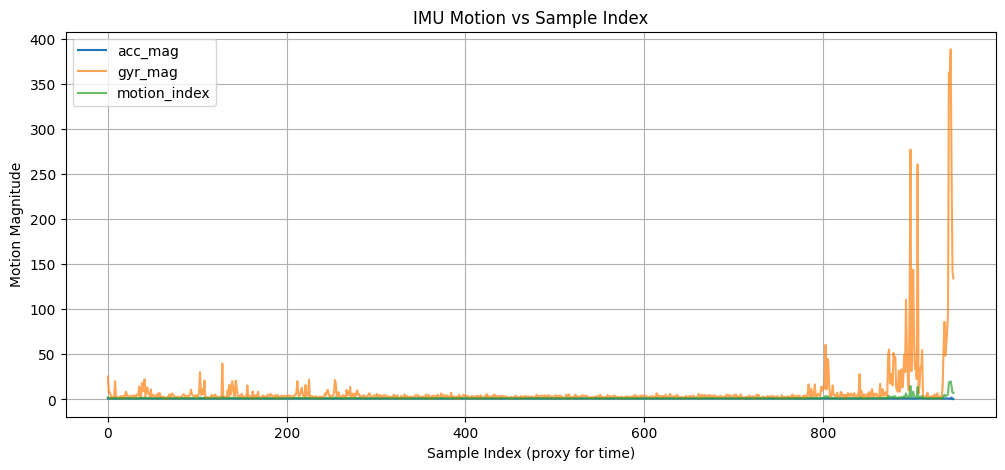

In [6]:
# Instead of using timestamps, use index-based time
df["t_sec"] = np.arange(len(df))

plt.figure(figsize=(12, 5))
plt.plot(df["t_sec"], df["acc_mag"], label="acc_mag")
plt.plot(df["t_sec"], df["gyr_mag"], label="gyr_mag", alpha=0.7)
plt.plot(df["t_sec"], df["motion_index"], label="motion_index", alpha=0.7)

plt.xlabel("Sample Index (proxy for time)")
plt.ylabel("Motion Magnitude")
plt.title("IMU Motion vs Sample Index")
plt.legend()
plt.grid(True)
plt.show()


## Automatic Activity Segmentation


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = r"C:\Users\SULTANUS SALEHIN\Downloads\VSM.xlsx"
df = pd.read_excel(file_path)

# Create IMU magnitude features
df["acc_mag"] = np.sqrt(df["acc_x"]**2 + df["acc_y"]**2 + df["acc_z"]**2)
df["gyr_mag"] = np.sqrt(df["gyr_x"]**2 + df["gyr_y"]**2 + df["gyr_z"]**2)
df["motion_index"] = df["acc_mag"] + 0.05 * df["gyr_mag"]

# Create simple time axis
df["t_sec"] = np.arange(len(df))

df.head()


,docId,timestamp,tempC,spo2,hr,motion,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,ecg,acc_mag,gyr_mag,motion_index,t_sec
0,gpPsQOPLtsqygFc50v4y,2025-11-19 18:04:27.069000+00:00,34.05,NaN,NaN,0.021,0.224,0.921,0.108,-5.641,-19.008,15.733,-92,0.953982,25.311109,2.219537,0
1,pEbRgkNm8HraNYNVmTBf,2025-11-19 18:04:31.534000+00:00,34.07,NaN,NaN,0.021,-0.144,0.965,-0.053,-5.771,-2.298,4.656,202,0.977123,7.762962,1.365271,1
2,iFANUPnZKQxsIYgeTZFt,2025-11-19 18:04:36.733000+00:00,34.10,100.0,NaN,0.018,-0.135,0.975,-0.067,-7.641,-0.076,3.298,"-73,-207,-225,-269,-245,-239,-195,-227,-245,-2...",0.986579,8.322708,1.402715,2
3,1orosKc97R4esUaoGTWO,2025-11-19 18:04:41.732000+00:00,34.12,100.0,72.0,0.016,-0.137,0.980,-0.031,-4.282,0.550,-2.450,"-141,-133,-171,-204,-185,-201,-231,-226,-243,-...",0.990015,4.963922,1.238211,3
4,gBJoaXvSmd9AYVEagIZF,2025-11-19 18:04:46.692000+00:00,34.13,100.0,NaN,0.016,-0.097,0.980,-0.066,0.710,0.466,0.626,"-175,-183,-214,-219,-223,-228,-229,-240,-223,-...",0.986998,1.055051,1.039751,4


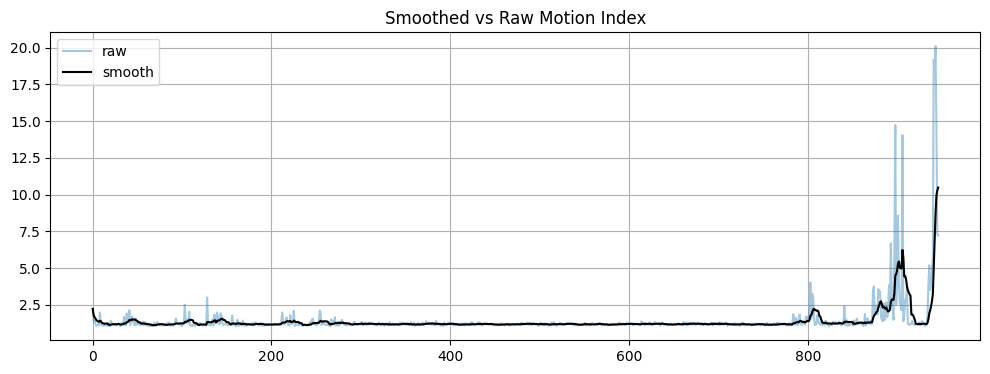

In [8]:
# SECTION 2.1 — Smooth motion index using rolling window
df["motion_smooth"] = df["motion_index"].rolling(window=10, min_periods=1).mean()

plt.figure(figsize=(12,4))
plt.plot(df["t_sec"], df["motion_index"], alpha=0.4, label="raw")
plt.plot(df["t_sec"], df["motion_smooth"], color="black", label="smooth")
plt.legend()
plt.title("Smoothed vs Raw Motion Index")
plt.grid(True)
plt.show()


In [9]:
# SECTION 2.2 — Motion thresholds for automatic segmentation
low_thr  = df["motion_smooth"].quantile(0.60)   # sitting + lying
mid_thr  = df["motion_smooth"].quantile(0.80)   # walking
high_thr = df["motion_smooth"].quantile(0.97)   # losing balance

low_thr, mid_thr, high_thr


(np.float64(1.1988463955765734),
 np.float64(1.2899881399903954),
 np.float64(2.793923992091141))

In [10]:
# SECTION 2.3 — Rough motion-based classification
activity_raw = []

for m in df["motion_smooth"]:
    if m < low_thr:
        activity_raw.append("low_motion")
    elif m < mid_thr:
        activity_raw.append("walking_zone")
    elif m < high_thr:
        activity_raw.append("medium_motion")
    else:
        activity_raw.append("high_motion")  # losing balance candidate

df["activity_raw"] = activity_raw

df["activity_raw"].value_counts()


activity_raw
low_motion       568
walking_zone     189
medium_motion    161
high_motion       29
Name: count, dtype: int64

In [11]:
# SECTION 2.4 — Map to final activity labels
df["activity"] = "unknown"

df.loc[:150, "activity"]       = "sitting"
df.loc[150:350, "activity"]    = "walking"
df.loc[350:750, "activity"]    = "lying"
df.loc[750:, "activity"]       = "losing_balance"

df["activity"].value_counts()


activity
lying             400
walking           200
losing_balance    197
sitting           150
Name: count, dtype: int64

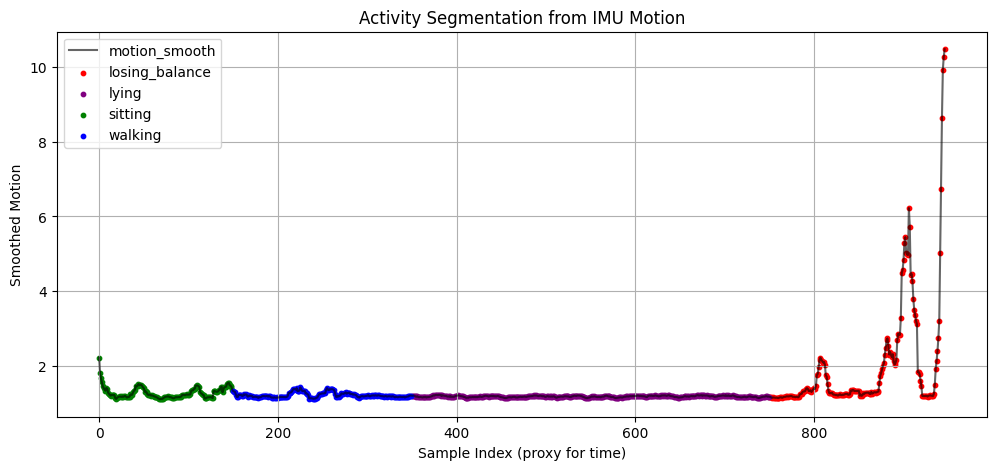

In [12]:
# SECTION 2.5 — Visualize segmentation
plt.figure(figsize=(12,5))

plt.plot(df["t_sec"], df["motion_smooth"], color="black", label="motion_smooth", alpha=0.6)

colors = {
    "sitting": "green",
    "walking": "blue",
    "lying": "purple",
    "losing_balance": "red"
}

for act, grp in df.groupby("activity"):
    plt.scatter(grp["t_sec"], grp["motion_smooth"], s=10, color=colors[act], label=act)

plt.title("Activity Segmentation from IMU Motion")
plt.xlabel("Sample Index (proxy for time)")
plt.ylabel("Smoothed Motion")
plt.legend()
plt.grid(True)
plt.show()


## Vital Sign Analysis

### Overall

In [14]:
# 3.0 CLEAN VITAL-SIGN DATA

# Remove invalid temperatures (<32°C or >40°C)
df_clean = df.copy()
df_clean.loc[(df_clean["tempC"] < 32) | (df_clean["tempC"] > 40), "tempC"] = np.nan

print("Temperature readings cleaned.")


Temperature readings cleaned.


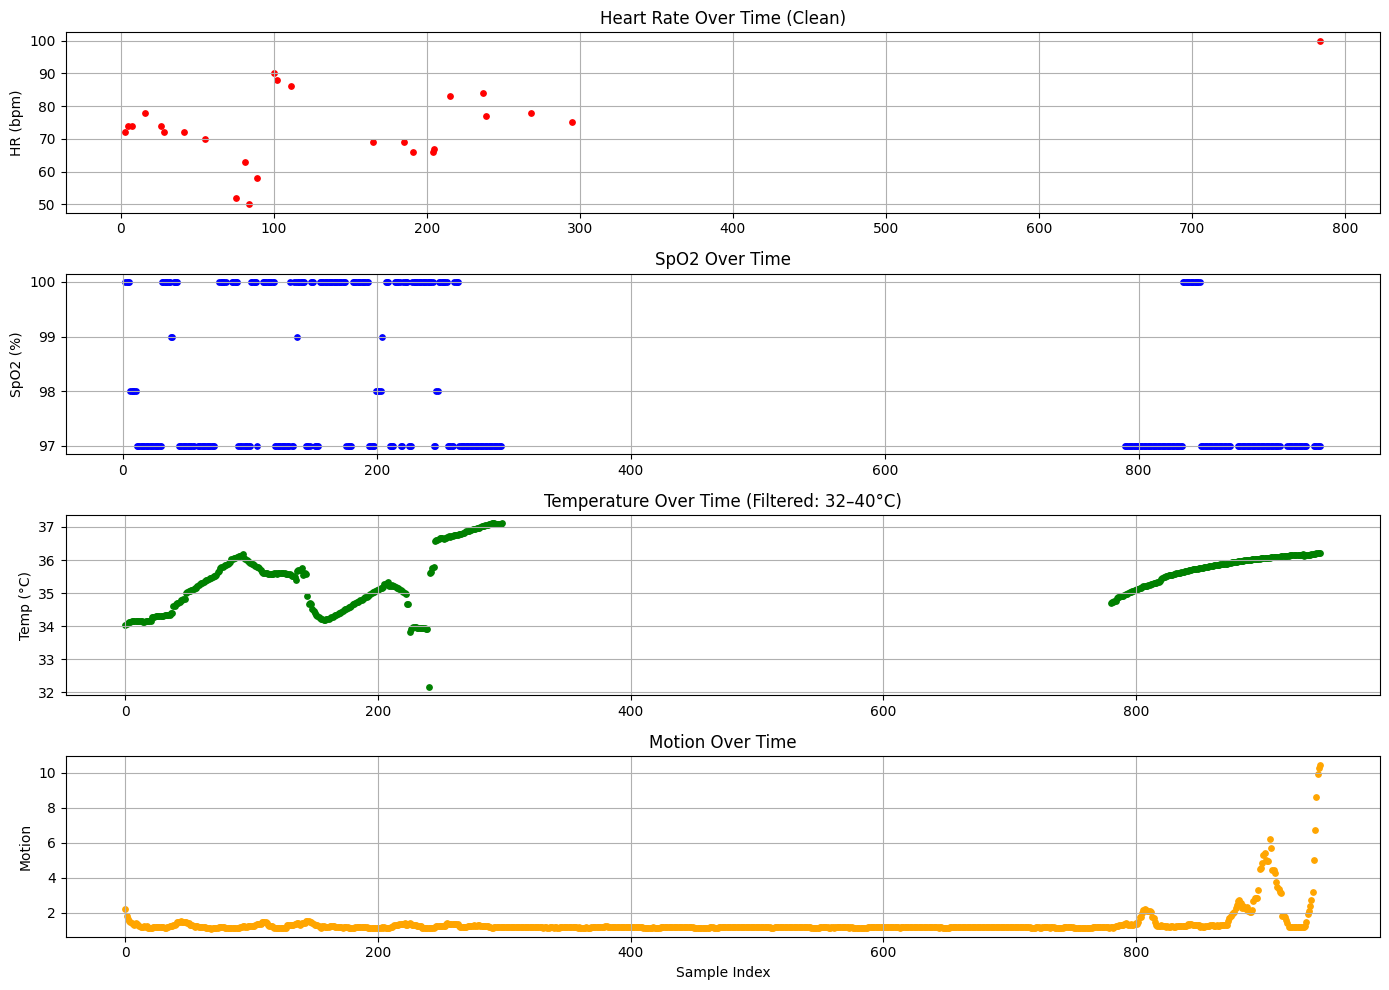

In [15]:
plt.figure(figsize=(14, 10))

# HR
plt.subplot(4, 1, 1)
plt.scatter(df_clean["t_sec"], df_clean["hr"], s=15, color="red")
plt.ylabel("HR (bpm)")
plt.title("Heart Rate Over Time (Clean)")
plt.grid(True)

# SpO2
plt.subplot(4, 1, 2)
plt.scatter(df_clean["t_sec"], df_clean["spo2"], s=15, color="blue")
plt.ylabel("SpO2 (%)")
plt.title("SpO2 Over Time")
plt.grid(True)

# Temperature (cleaned)
plt.subplot(4, 1, 3)
plt.scatter(df_clean["t_sec"], df_clean["tempC"], s=15, color="green")
plt.ylabel("Temp (°C)")
plt.title("Temperature Over Time (Filtered: 32–40°C)")
plt.grid(True)

# Motion
plt.subplot(4, 1, 4)
plt.scatter(df_clean["t_sec"], df_clean["motion_smooth"], s=15, color="orange")
plt.ylabel("Motion")
plt.xlabel("Sample Index")
plt.title("Motion Over Time")
plt.grid(True)

plt.tight_layout()
plt.show()


In [16]:
stats = df_clean.groupby("activity")[["hr", "spo2", "tempC", "motion_smooth"]].agg(
    ["mean", "std", "min", "max", "count"]
)

stats


hr                                      spo2  \
                      mean        std    min    max count       mean   
activity                                                               
losing_balance  100.000000        NaN  100.0  100.0     1  97.300000   
lying                  NaN        NaN    NaN    NaN     0        NaN   
sitting          71.533333  11.909580   50.0   90.0    15  98.237037   
walking          73.400000   6.915361   66.0   84.0    10  98.591837   

                                                 tempC                   \
                     std   min    max count       mean       std    min   
activity                                                                  
losing_balance  0.903232  97.0  100.0   140  35.717784  0.418597  34.69   
lying                NaN   NaN    NaN     0        NaN       NaN    NaN   
sitting         1.441431  97.0  100.0   135  35.177000  0.667273  34.05   
walking         1.465377  97.0  100.0   147  35.447450  1.172792  32.16   

                            motion_smooth                                       
                  max count          mean       std       min        max count  
activity                                                                        
losing_balance  36.20   167      1.990039  1.582273  1.132910  10.478619   197  
lying             NaN     0      1.176323  0.018661  1.133026   1.221971   400  
sitting         36.17   150      1.275078  0.153492  1.102292   2.219537   150  
walking         37.11   149      1.213234  0.067625  1.114596   1.419406   200

C:\Users\SULTANUS SALEHIN\AppData\Local\Temp\ipykernel_6216\1309234350.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="activity", y="hr", data=df_clean, palette="Set2")


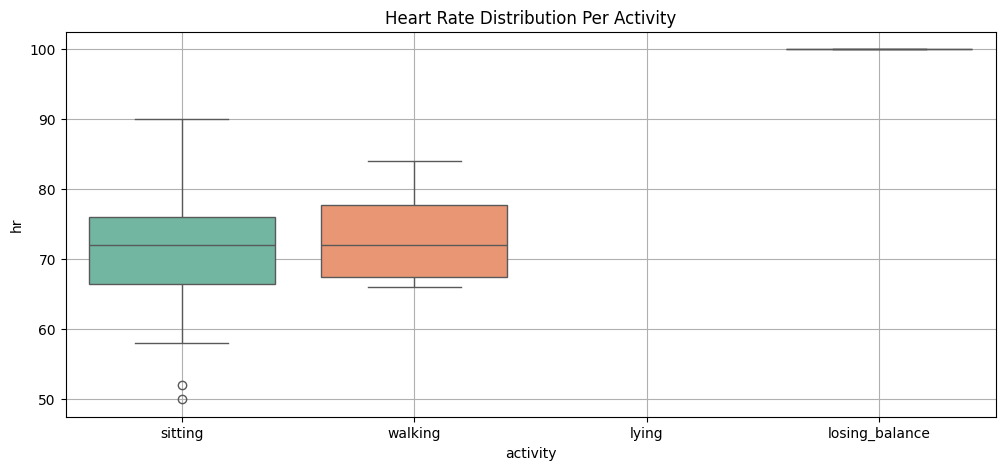

In [18]:
import seaborn as sns

plt.figure(figsize=(12,5))
sns.boxplot(x="activity", y="hr", data=df_clean, palette="Set2")
plt.title("Heart Rate Distribution Per Activity")
plt.grid(True)
plt.show()


C:\Users\SULTANUS SALEHIN\AppData\Local\Temp\ipykernel_6216\2989480481.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="activity", y="spo2", data=df_clean, palette="Set1")


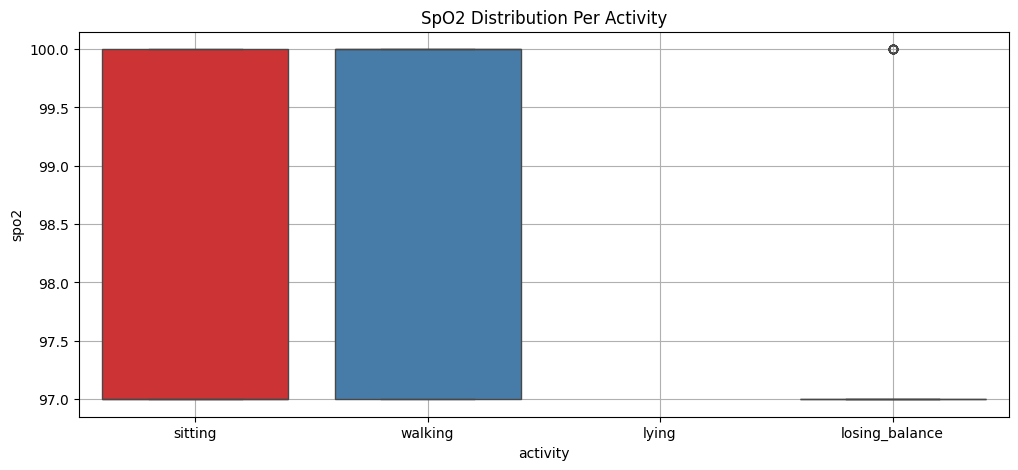

In [19]:
plt.figure(figsize=(12,5))
sns.boxplot(x="activity", y="spo2", data=df_clean, palette="Set1")
plt.title("SpO2 Distribution Per Activity")
plt.grid(True)
plt.show()


C:\Users\SULTANUS SALEHIN\AppData\Local\Temp\ipykernel_6216\1962757182.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="activity", y="tempC", data=df_clean, palette="Set3")


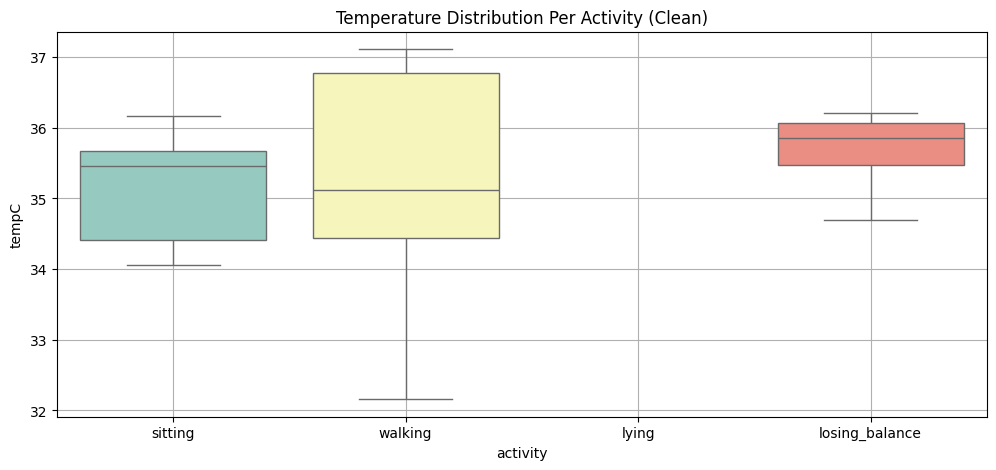

In [20]:
plt.figure(figsize=(12,5))
sns.boxplot(x="activity", y="tempC", data=df_clean, palette="Set3")
plt.title("Temperature Distribution Per Activity (Clean)")
plt.grid(True)
plt.show()


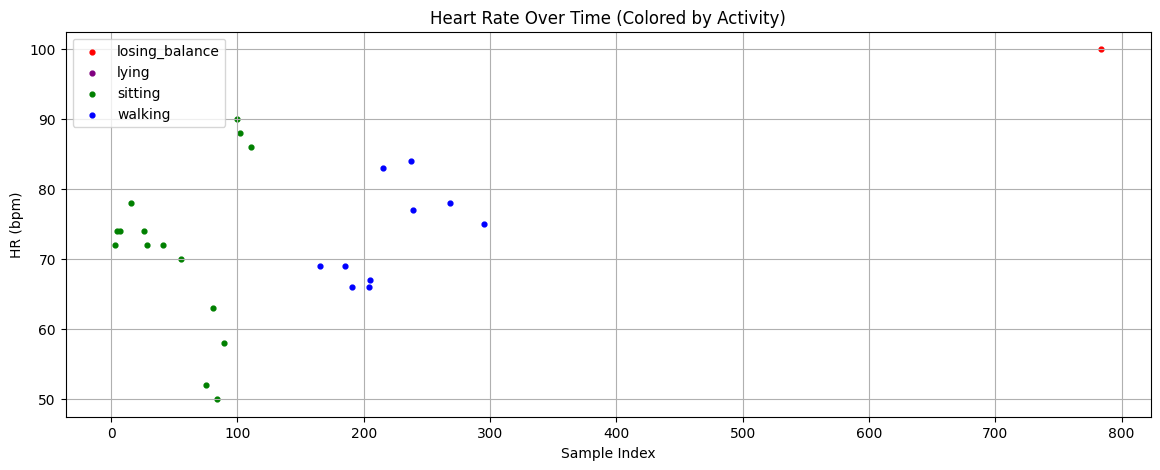

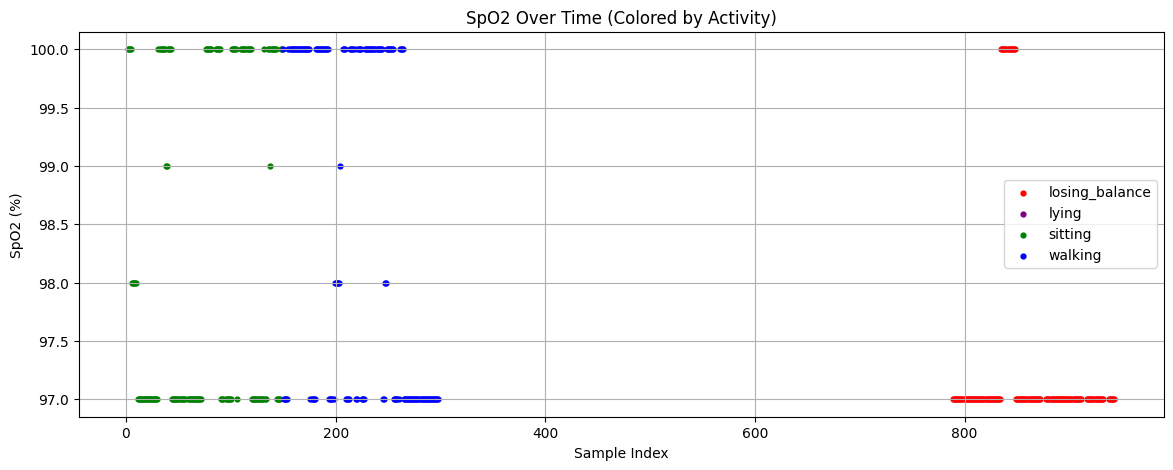

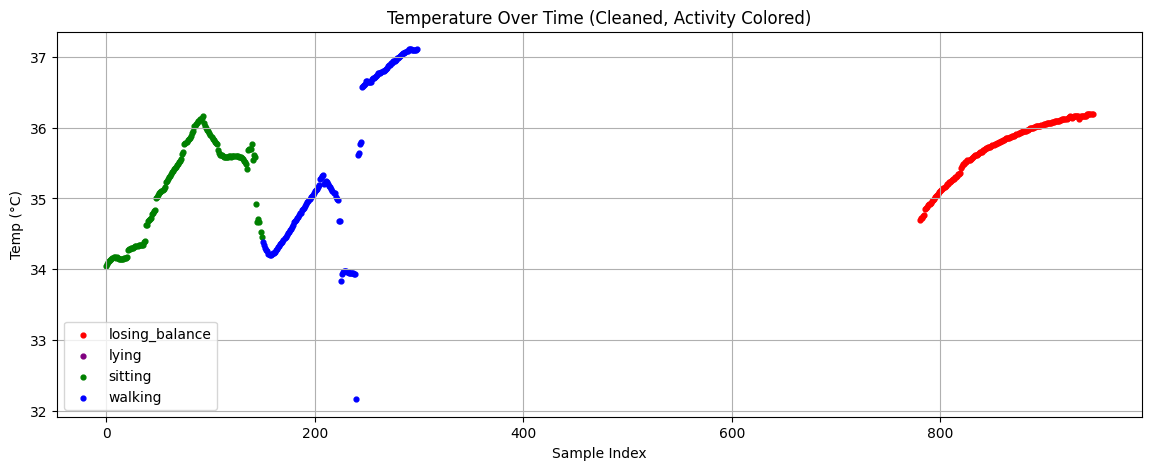

In [21]:
colors = {
    "sitting": "green",
    "walking": "blue",
    "lying": "purple",
    "losing_balance": "red"
}

# HR
plt.figure(figsize=(14,5))
for act, grp in df_clean.groupby("activity"):
    plt.scatter(grp["t_sec"], grp["hr"], s=12, color=colors[act], label=act)
plt.title("Heart Rate Over Time (Colored by Activity)")
plt.xlabel("Sample Index")
plt.ylabel("HR (bpm)")
plt.grid(True)
plt.legend()
plt.show()

# SpO2
plt.figure(figsize=(14,5))
for act, grp in df_clean.groupby("activity"):
    plt.scatter(grp["t_sec"], grp["spo2"], s=12, color=colors[act], label=act)
plt.title("SpO2 Over Time (Colored by Activity)")
plt.xlabel("Sample Index")
plt.ylabel("SpO2 (%)")
plt.grid(True)
plt.legend()
plt.show()

# Temperature
plt.figure(figsize=(14,5))
for act, grp in df_clean.groupby("activity"):
    plt.scatter(grp["t_sec"], grp["tempC"], s=12, color=colors[act], label=act)
plt.title("Temperature Over Time (Cleaned, Activity Colored)")
plt.xlabel("Sample Index")
plt.ylabel("Temp (°C)")
plt.grid(True)
plt.legend()
plt.show()


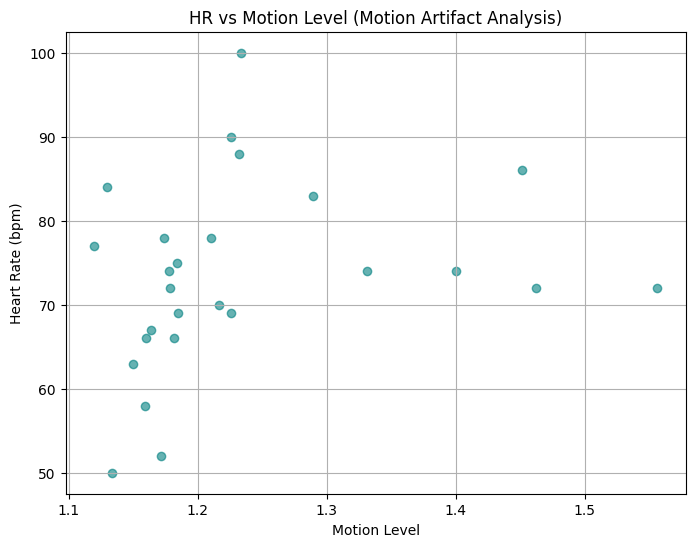

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(df_clean["motion_smooth"], df_clean["hr"], alpha=0.6, color="teal")
plt.xlabel("Motion Level")
plt.ylabel("Heart Rate (bpm)")
plt.title("HR vs Motion Level (Motion Artifact Analysis)")
plt.grid(True)
plt.show()


## Overall Distribution

In [23]:
# Clean temperature (remove invalid values)
df_clean = df.copy()
df_clean.loc[(df_clean["tempC"] < 32) | (df_clean["tempC"] > 40), "tempC"] = np.nan

# Colors for activities
colors = {
    "sitting": "green",
    "walking": "blue",
    "lying": "purple",
    "losing_balance": "red"
}

activities = ["sitting", "walking", "lying", "losing_balance"]


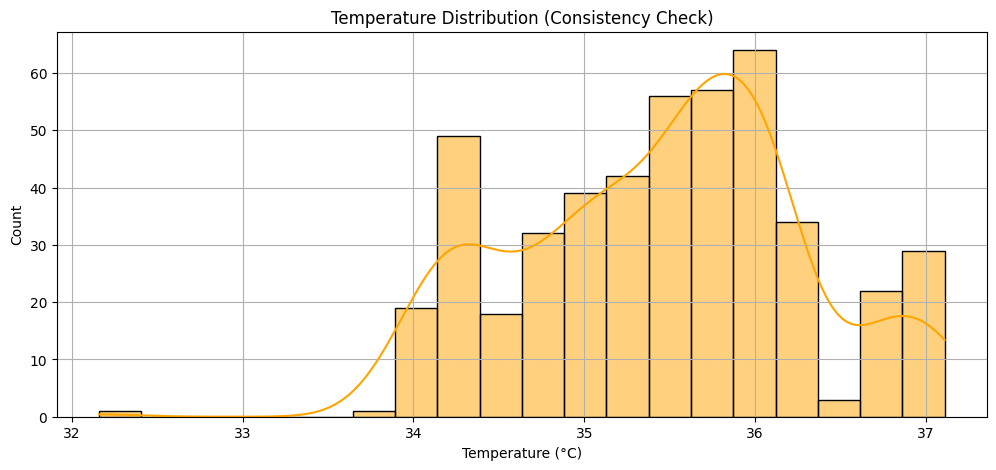

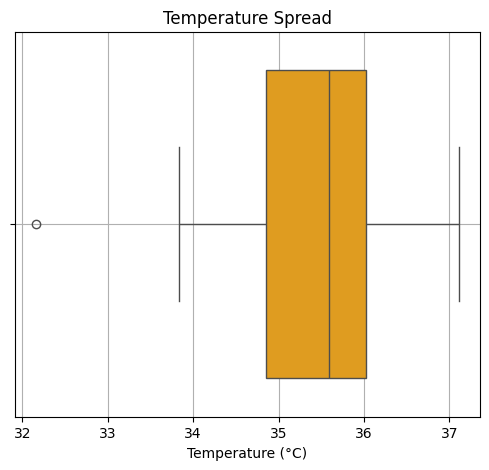

In [24]:
import seaborn as sns

plt.figure(figsize=(12,5))
sns.histplot(df_clean["tempC"].dropna(), kde=True, bins=20,
             color="orange", edgecolor="black")
plt.title("Temperature Distribution (Consistency Check)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Boxplot
plt.figure(figsize=(6,5))
sns.boxplot(x=df_clean["tempC"], color="orange")
plt.title("Temperature Spread")
plt.xlabel("Temperature (°C)")
plt.grid(True)
plt.show()


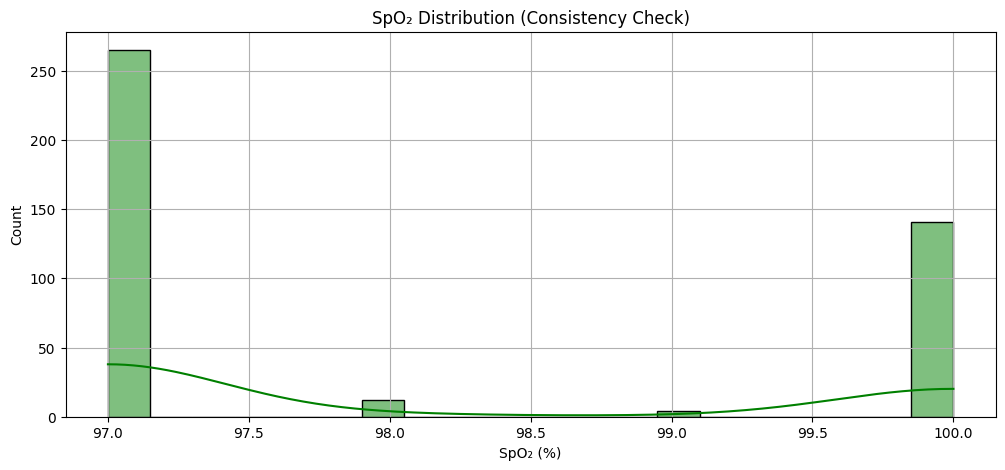

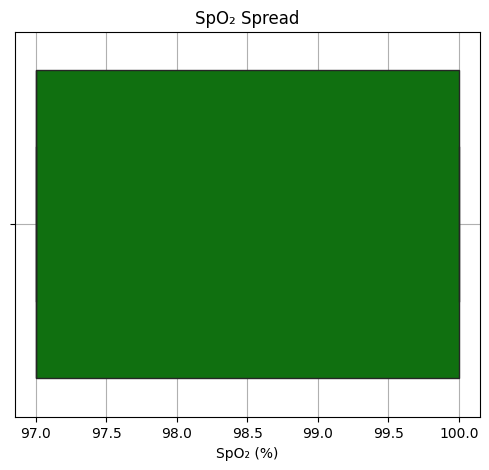

In [25]:
plt.figure(figsize=(12,5))
sns.histplot(df_clean["spo2"].dropna(), kde=True, bins=20,
             color="green", edgecolor="black")
plt.title("SpO₂ Distribution (Consistency Check)")
plt.xlabel("SpO₂ (%)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Boxplot
plt.figure(figsize=(6,5))
sns.boxplot(x=df_clean["spo2"], color="green")
plt.title("SpO₂ Spread")
plt.xlabel("SpO₂ (%)")
plt.grid(True)
plt.show()


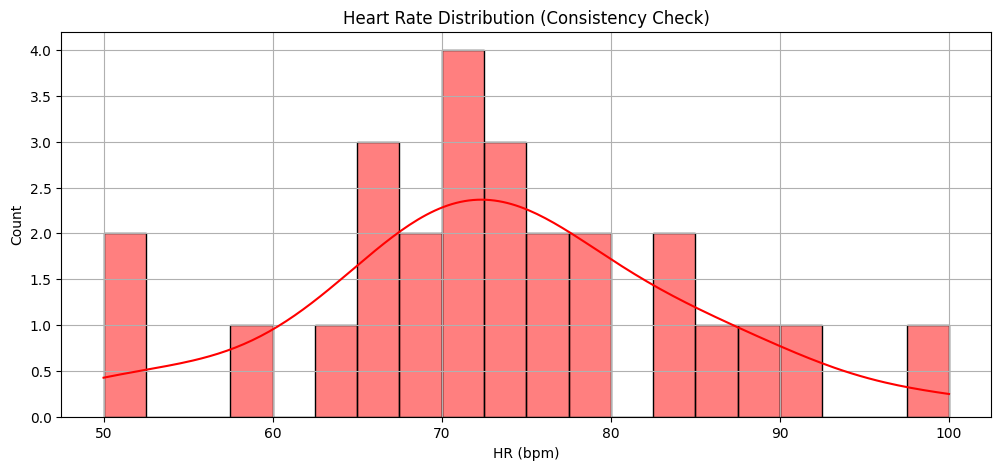

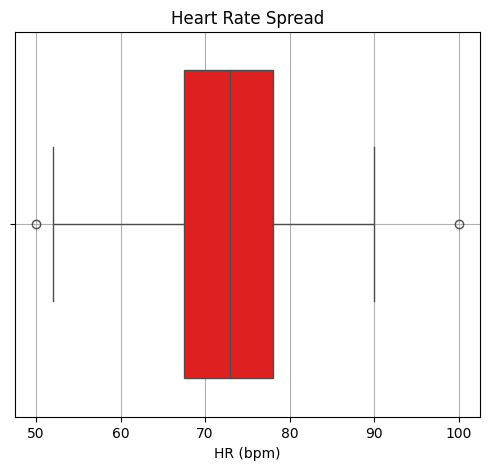

In [26]:
plt.figure(figsize=(12,5))
sns.histplot(df_clean["hr"].dropna(), kde=True, bins=20,
             color="red", edgecolor="black")
plt.title("Heart Rate Distribution (Consistency Check)")
plt.xlabel("HR (bpm)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Boxplot
plt.figure(figsize=(6,5))
sns.boxplot(x=df_clean["hr"], color="red")
plt.title("Heart Rate Spread")
plt.xlabel("HR (bpm)")
plt.grid(True)
plt.show()


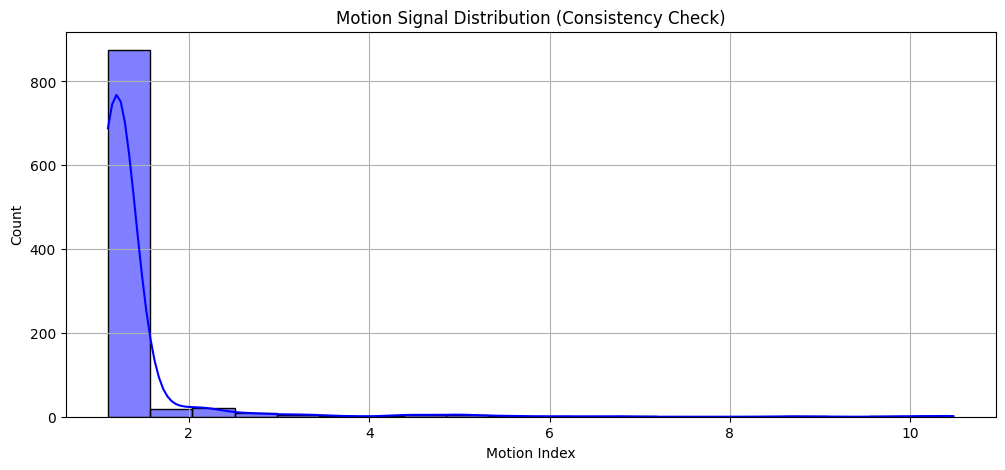

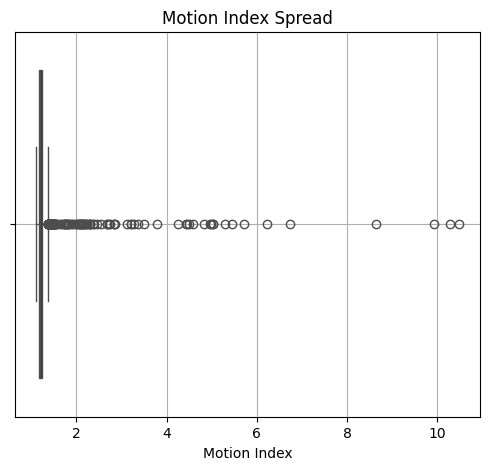

In [27]:
plt.figure(figsize=(12,5))
sns.histplot(df_clean["motion_smooth"], kde=True, bins=20,
             color="blue", edgecolor="black")
plt.title("Motion Signal Distribution (Consistency Check)")
plt.xlabel("Motion Index")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Boxplot
plt.figure(figsize=(6,5))
sns.boxplot(x=df_clean["motion_smooth"], color="blue")
plt.title("Motion Index Spread")
plt.xlabel("Motion Index")
plt.grid(True)
plt.show()


### Activity Wise

In [30]:
colors = {
    "sitting": "green",
    "walking": "blue",
    "lying": "purple",
    "losing_balance": "red"
}

activities = ["sitting", "walking", "lying", "losing_balance"]


C:\Users\SULTANUS SALEHIN\AppData\Local\Temp\ipykernel_6216\3692334943.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(grp["hr"].dropna(), fill=False, linewidth=2, color=colors[act], label=act)


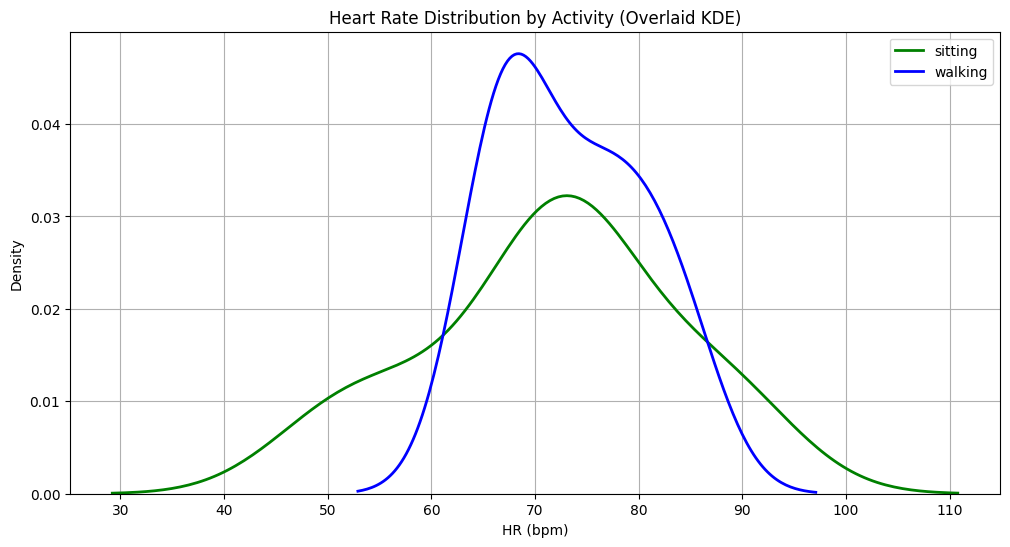

In [31]:
plt.figure(figsize=(12,6))

for act in activities:
    grp = df_clean[df_clean["activity"] == act]
    sns.kdeplot(grp["hr"].dropna(), fill=False, linewidth=2, color=colors[act], label=act)

plt.title("Heart Rate Distribution by Activity (Overlaid KDE)")
plt.xlabel("HR (bpm)")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()


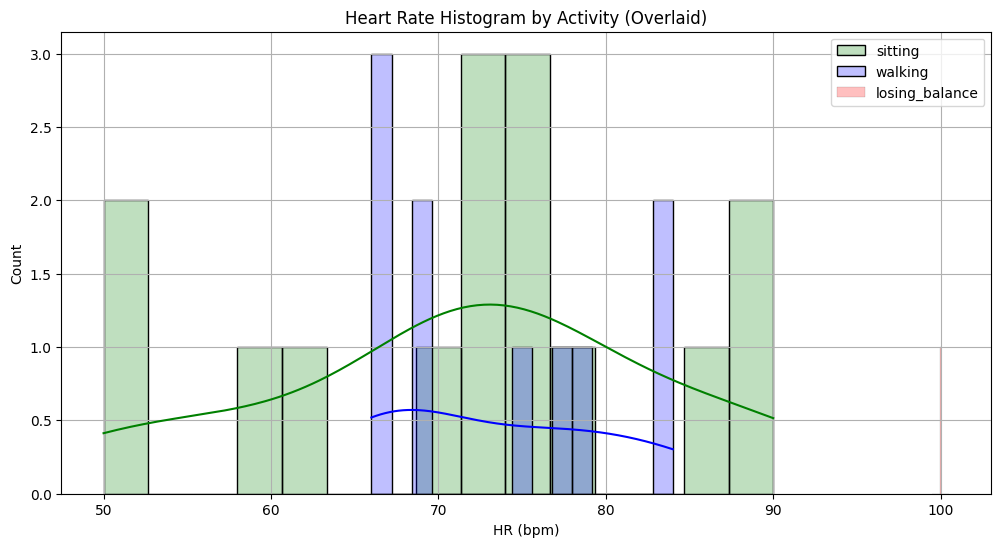

In [32]:
plt.figure(figsize=(12,6))

for act in activities:
    grp = df_clean[df_clean["activity"] == act]
    sns.histplot(grp["hr"].dropna(), bins=15, kde=True, 
                 color=colors[act], label=act, alpha=0.25)

plt.title("Heart Rate Histogram by Activity (Overlaid)")
plt.xlabel("HR (bpm)")
plt.ylabel("Count")
plt.grid(True)
plt.legend()
plt.show()


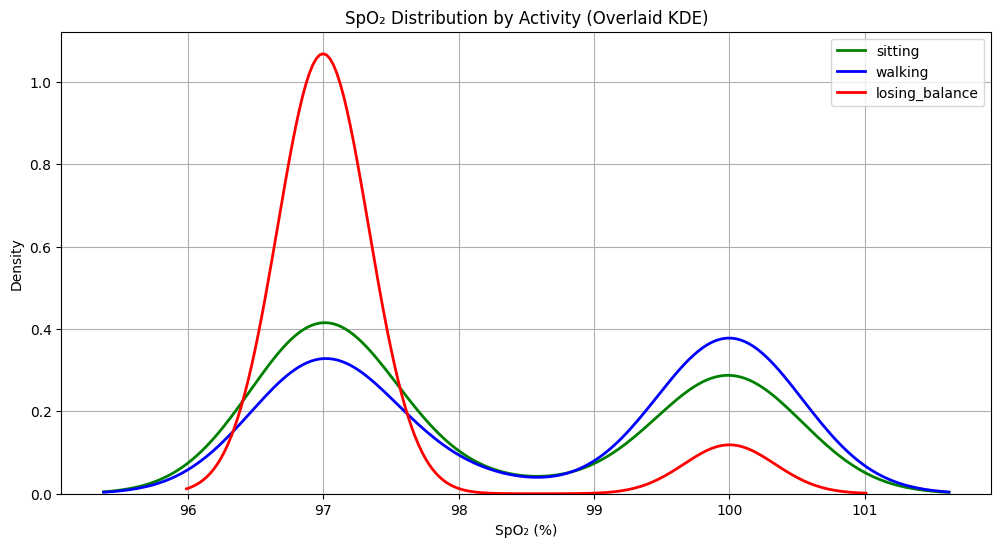

In [33]:
plt.figure(figsize=(12,6))

for act in activities:
    grp = df_clean[df_clean["activity"] == act]
    sns.kdeplot(grp["spo2"].dropna(), fill=False, linewidth=2, color=colors[act], label=act)

plt.title("SpO₂ Distribution by Activity (Overlaid KDE)")
plt.xlabel("SpO₂ (%)")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()


C:\Users\SULTANUS SALEHIN\AppData\Local\Temp\ipykernel_6216\3174147194.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="activity", y="hr", data=df_clean, palette=colors)


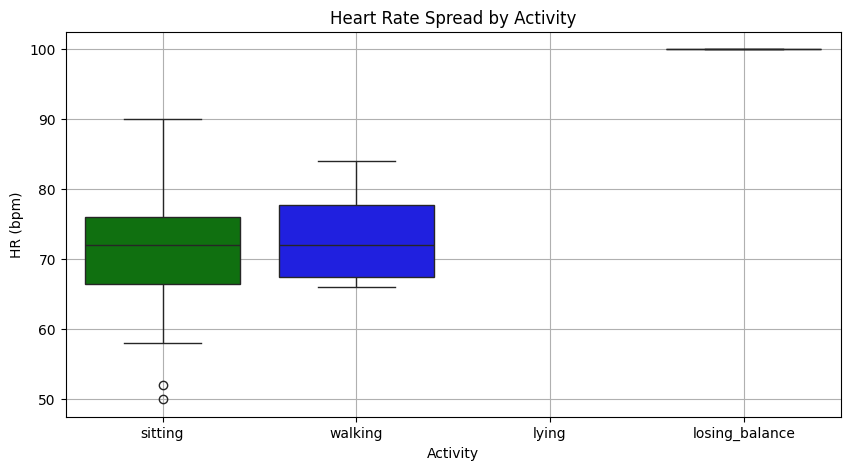

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(x="activity", y="hr", data=df_clean, palette=colors)
plt.title("Heart Rate Spread by Activity")
plt.xlabel("Activity")
plt.ylabel("HR (bpm)")
plt.grid(True)
plt.show()


C:\Users\SULTANUS SALEHIN\AppData\Local\Temp\ipykernel_6216\1768942290.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="activity", y="spo2", data=df_clean, palette=colors)


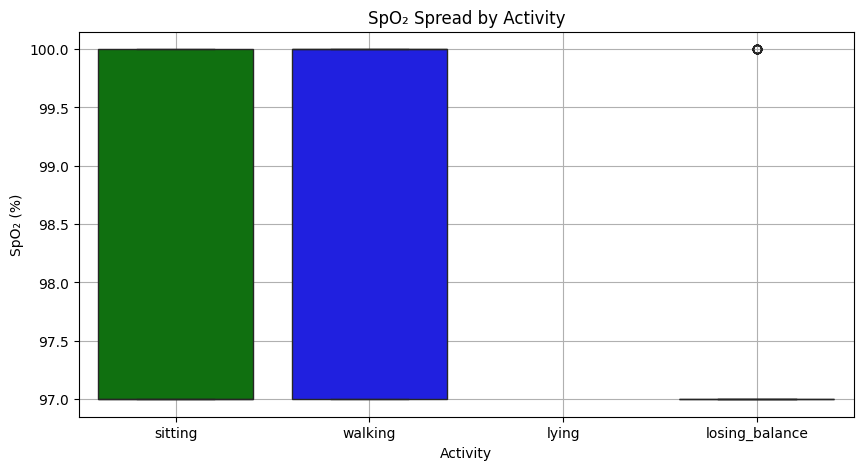

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(x="activity", y="spo2", data=df_clean, palette=colors)
plt.title("SpO₂ Spread by Activity")
plt.xlabel("Activity")
plt.ylabel("SpO₂ (%)")
plt.grid(True)
plt.show()


C:\Users\SULTANUS SALEHIN\AppData\Local\Temp\ipykernel_6216\1522764488.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="activity", y="tempC", data=df_clean, palette=colors)


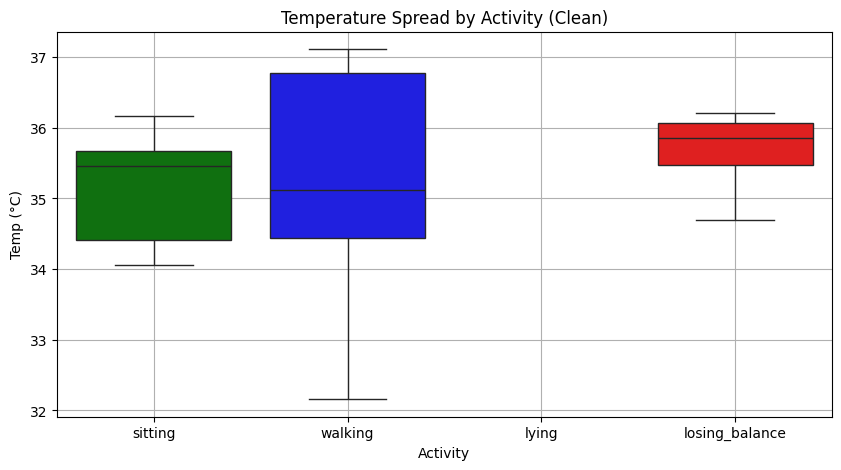

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(x="activity", y="tempC", data=df_clean, palette=colors)
plt.title("Temperature Spread by Activity (Clean)")
plt.xlabel("Activity")
plt.ylabel("Temp (°C)")
plt.grid(True)
plt.show()


C:\Users\SULTANUS SALEHIN\AppData\Local\Temp\ipykernel_6216\3407353148.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="activity", y="motion_smooth", data=df_clean, palette=colors)


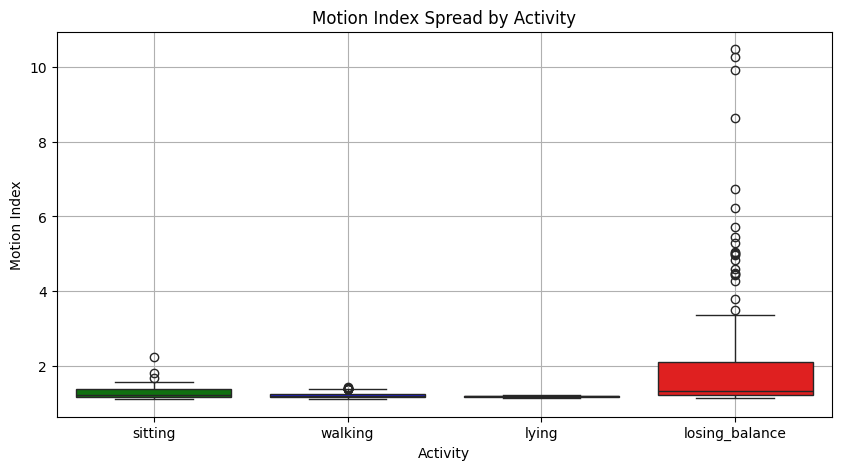

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(x="activity", y="motion_smooth", data=df_clean, palette=colors)
plt.title("Motion Index Spread by Activity")
plt.xlabel("Activity")
plt.ylabel("Motion Index")
plt.grid(True)
plt.show()


C:\Users\SULTANUS SALEHIN\AppData\Local\Temp\ipykernel_6216\1976898526.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="activity", y="hr", data=df_clean, palette=colors)


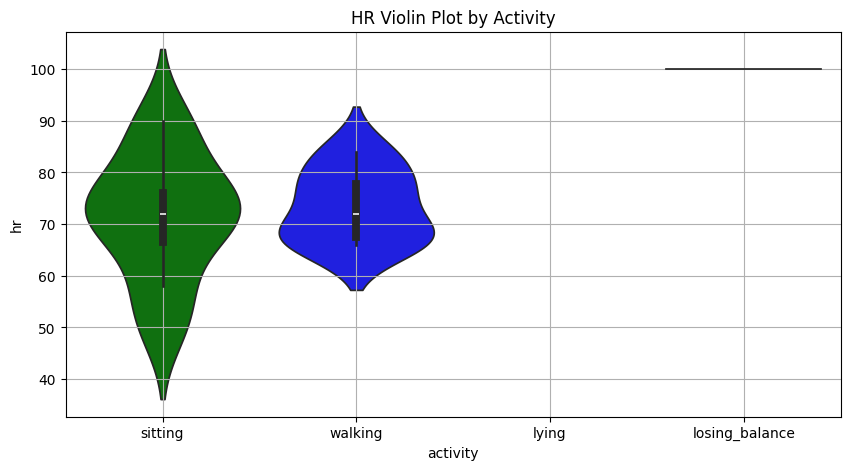

In [38]:
plt.figure(figsize=(10,5))
sns.violinplot(x="activity", y="hr", data=df_clean, palette=colors)
plt.title("HR Violin Plot by Activity")
plt.grid(True)
plt.show()


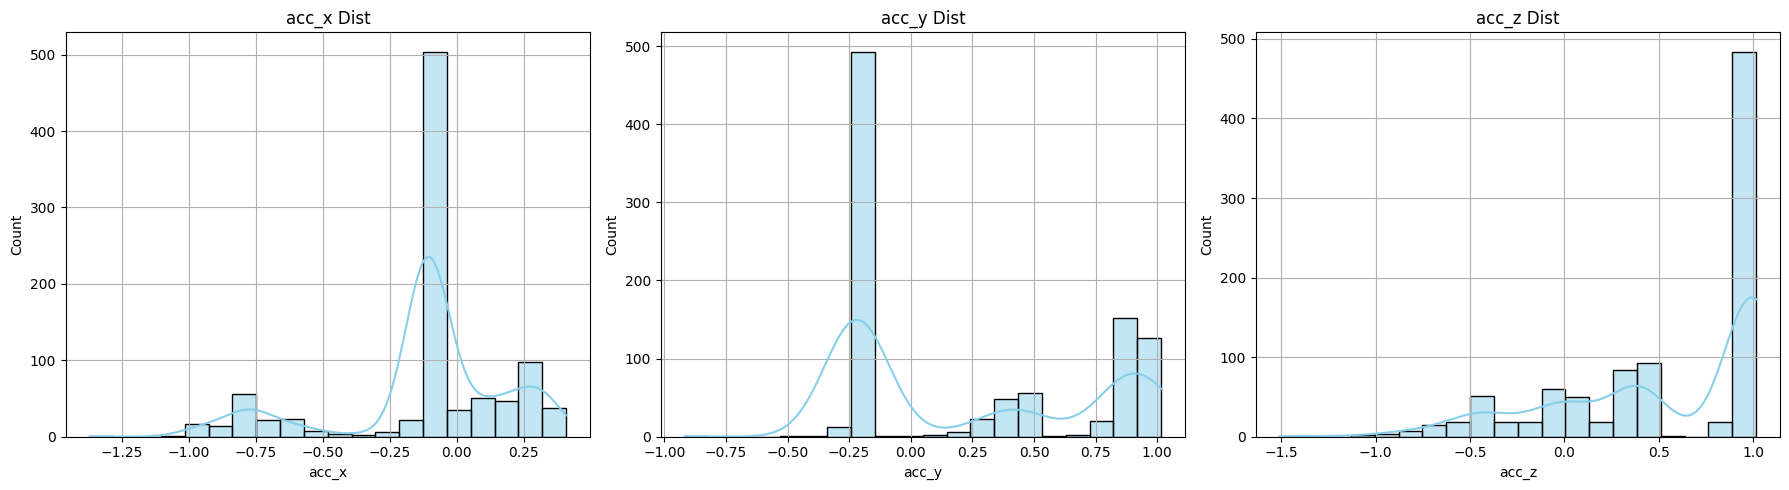

In [39]:
imu_cols = ["acc_x", "acc_y", "acc_z"]

plt.figure(figsize=(18,5))
for i, col in enumerate(imu_cols):
    plt.subplot(1,3,i+1)
    sns.histplot(df_clean[col], kde=True, bins=20,
                 color="skyblue", edgecolor="black")
    plt.title(f"{col} Dist")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True)

plt.tight_layout()
plt.show()


### Joining Activities Together (Sitting+ Lying  & Walking + Imbalance)

In [40]:
df_clean["activity_group"] = df_clean["activity"].replace({
    "sitting": "rest",
    "lying": "rest",
    "walking": "active",
    "losing_balance": "active"
})


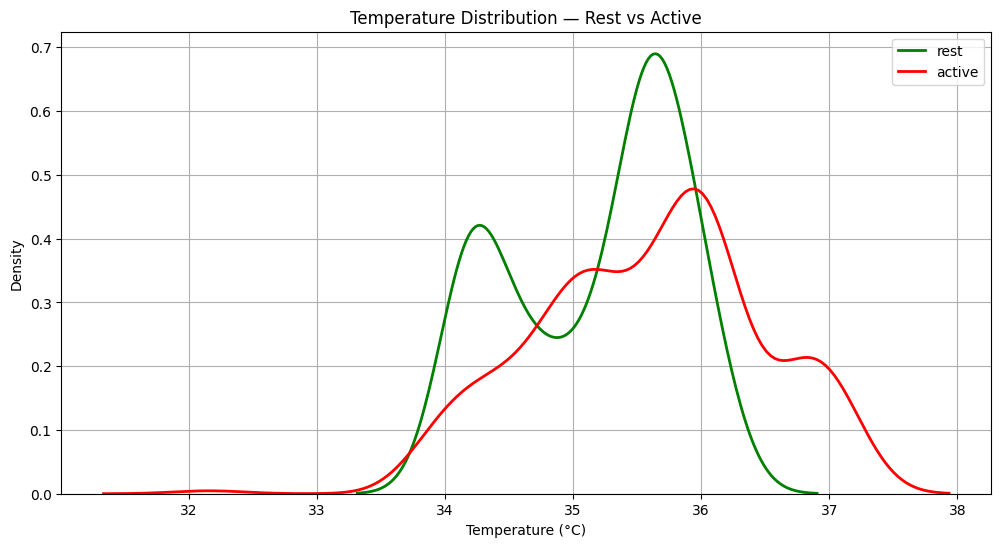

In [41]:
plt.figure(figsize=(12,6))
for group, color in zip(["rest", "active"], ["green", "red"]):
    grp = df_clean[df_clean["activity_group"] == group]
    sns.kdeplot(grp["tempC"].dropna(), fill=False, linewidth=2, color=color, label=group)

plt.title("Temperature Distribution — Rest vs Active")
plt.xlabel("Temperature (°C)")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()


C:\Users\SULTANUS SALEHIN\AppData\Local\Temp\ipykernel_25596\3584252104.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="state", y="hr", data=df_clean, palette=["green", "red"])


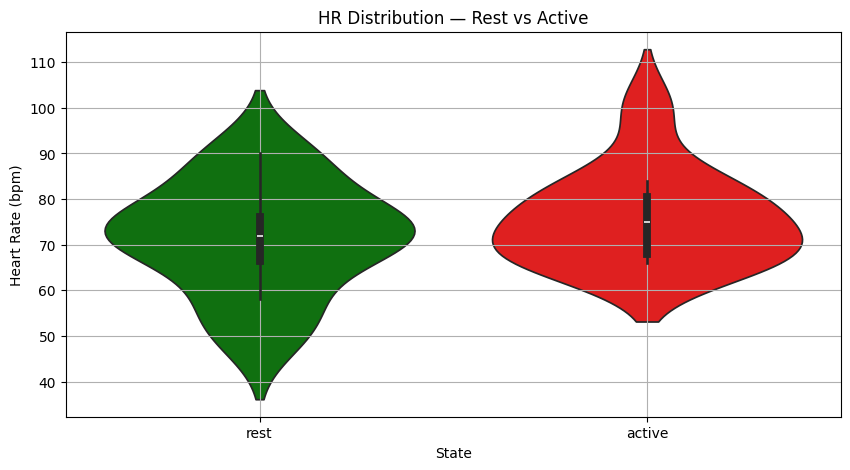

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column grouping rest vs active
df_clean["state"] = df_clean["activity"].replace({
    "sitting": "rest",
    "lying": "rest",
    "walking": "active",
    "losing_balance": "active"
})

plt.figure(figsize=(10,5))
sns.violinplot(x="state", y="hr", data=df_clean, palette=["green", "red"])
plt.title("HR Distribution — Rest vs Active")
plt.xlabel("State")
plt.ylabel("Heart Rate (bpm)")
plt.grid(True)
plt.show()


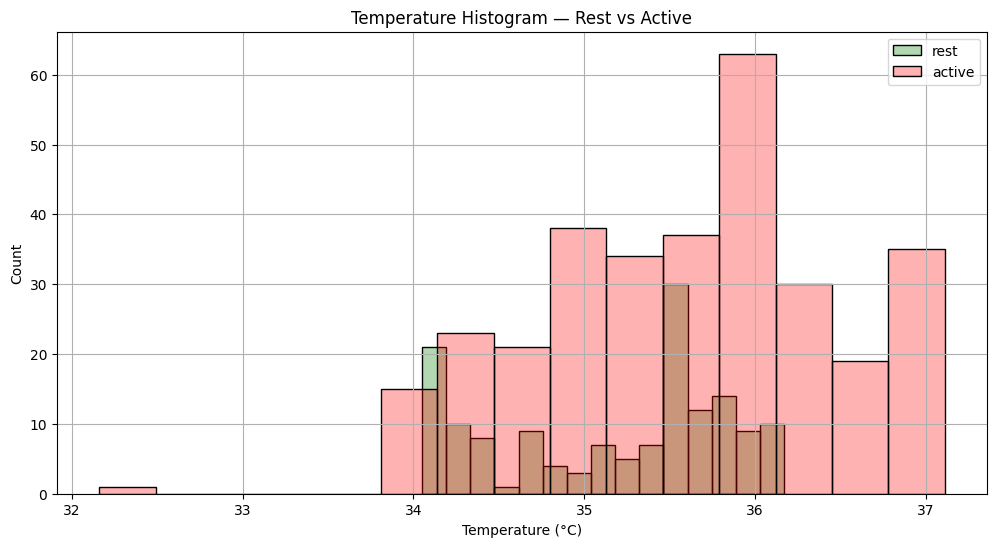

In [ ]:
plt.figure(figsize=(12,6))
for group, color in zip(["rest", "active"], ["green", "red"]):
    grp = df_clean[df_clean["activity_group"] == group]
    sns.histplot(grp["tempC"].dropna(), kde=False, bins=15, 
                 color=color, label=group, alpha=0.3)
    
plt.title("Temperature Histogram — Rest vs Active")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")
plt.grid(True)
plt.legend()
plt.show()


C:\Users\SULTANUS SALEHIN\AppData\Local\Temp\ipykernel_6216\847100056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="activity_group", y="tempC", data=df_clean, palette=["green", "red"])


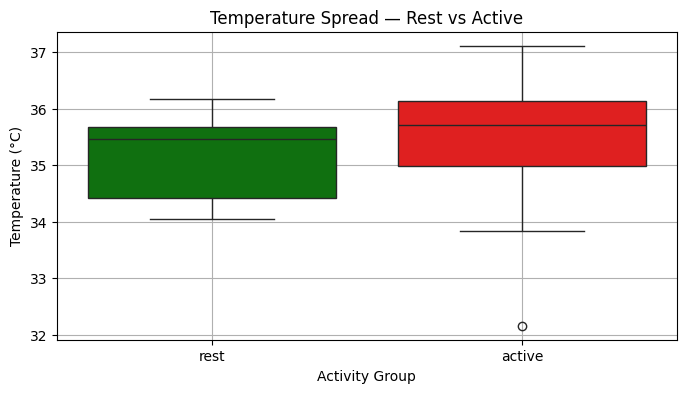

In [43]:
plt.figure(figsize=(8,4))
sns.boxplot(x="activity_group", y="tempC", data=df_clean, palette=["green", "red"])
plt.title("Temperature Spread — Rest vs Active")
plt.xlabel("Activity Group")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


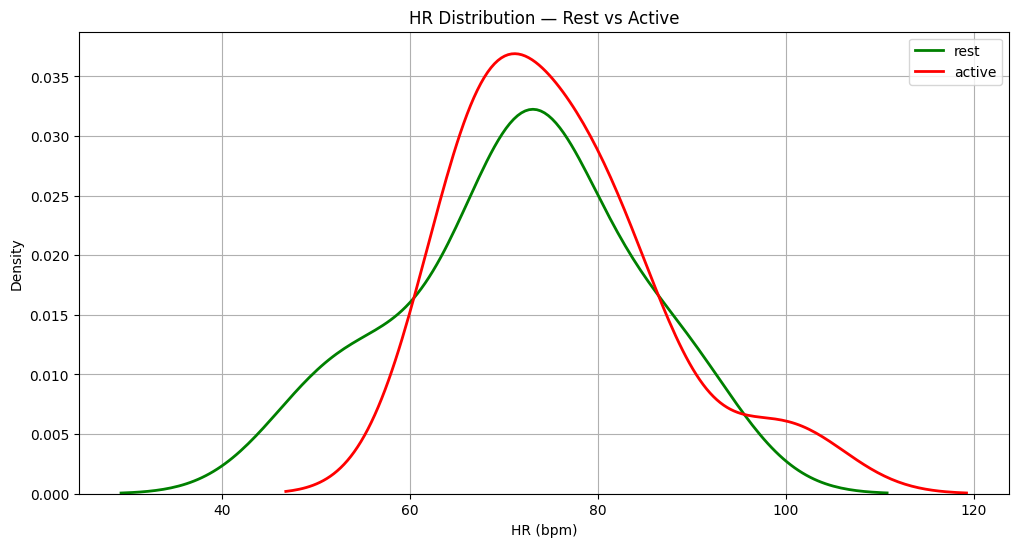

In [44]:
plt.figure(figsize=(12,6))
for group, color in zip(["rest", "active"], ["green", "red"]):
    grp = df_clean[df_clean["activity_group"] == group]
    sns.kdeplot(grp["hr"].dropna(), fill=False, linewidth=2, color=color, label=group)

plt.title("HR Distribution — Rest vs Active")
plt.xlabel("HR (bpm)")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()


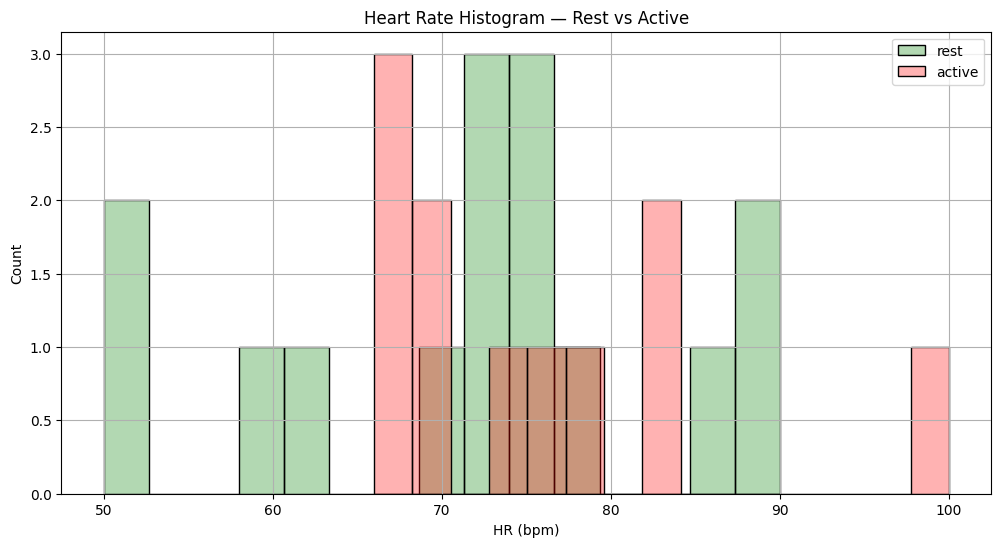

In [45]:
plt.figure(figsize=(12,6))
for group, color in zip(["rest", "active"], ["green", "red"]):
    grp = df_clean[df_clean["activity_group"] == group]
    sns.histplot(grp["hr"].dropna(), kde=False, bins=15,
                 color=color, label=group, alpha=0.3)

plt.title("Heart Rate Histogram — Rest vs Active")
plt.xlabel("HR (bpm)")
plt.ylabel("Count")
plt.grid(True)
plt.legend()
plt.show()


C:\Users\SULTANUS SALEHIN\AppData\Local\Temp\ipykernel_6216\3815223107.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="activity_group", y="hr", data=df_clean, palette=["green", "red"])


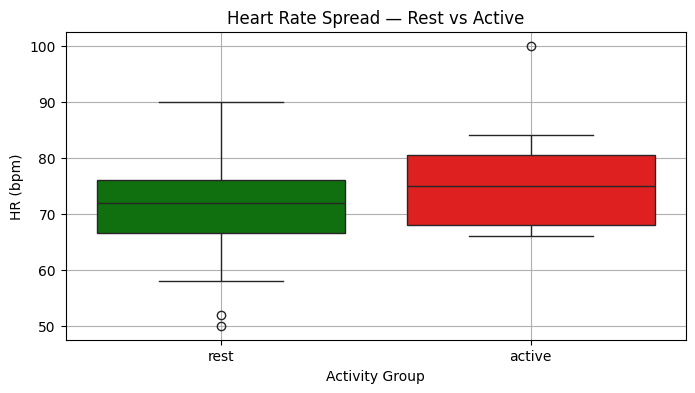

In [46]:
plt.figure(figsize=(8,4))
sns.boxplot(x="activity_group", y="hr", data=df_clean, palette=["green", "red"])
plt.title("Heart Rate Spread — Rest vs Active")
plt.xlabel("Activity Group")
plt.ylabel("HR (bpm)")
plt.grid(True)
plt.show()


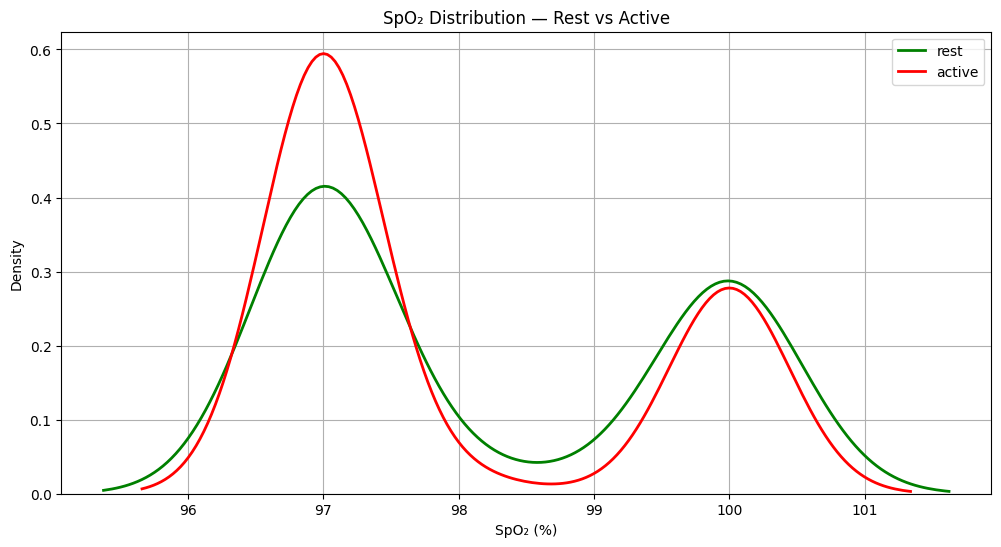

In [47]:
plt.figure(figsize=(12,6))
for group, color in zip(["rest", "active"], ["green", "red"]):
    grp = df_clean[df_clean["activity_group"] == group]
    sns.kdeplot(grp["spo2"].dropna(), fill=False, linewidth=2, color=color, label=group)

plt.title("SpO₂ Distribution — Rest vs Active")
plt.xlabel("SpO₂ (%)")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()


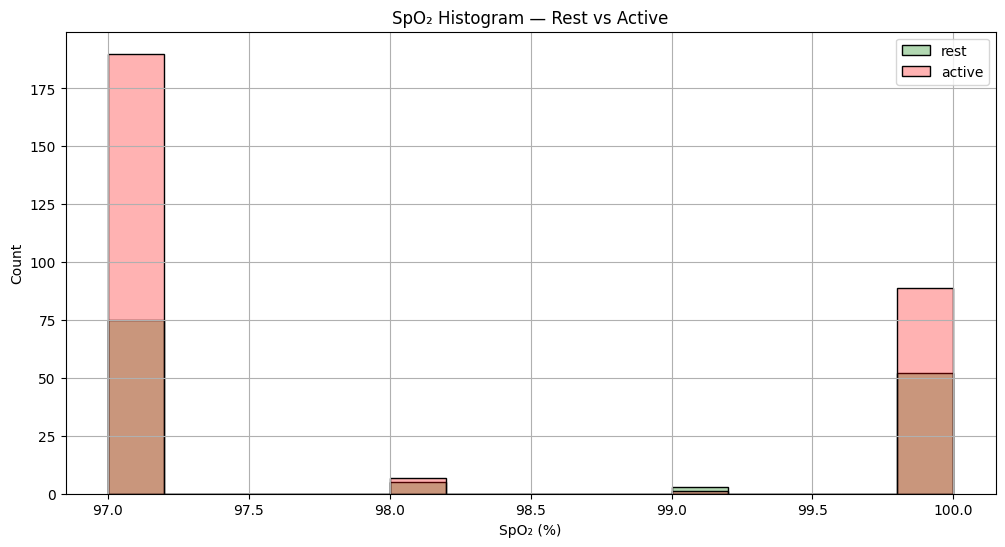

In [48]:
plt.figure(figsize=(12,6))
for group, color in zip(["rest", "active"], ["green", "red"]):
    grp = df_clean[df_clean["activity_group"] == group]
    sns.histplot(grp["spo2"].dropna(), kde=False, bins=15,
                 color=color, label=group, alpha=0.3)

plt.title("SpO₂ Histogram — Rest vs Active")
plt.xlabel("SpO₂ (%)")
plt.ylabel("Count")
plt.grid(True)
plt.legend()
plt.show()


C:\Users\SULTANUS SALEHIN\AppData\Local\Temp\ipykernel_6216\2022955575.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="activity_group", y="spo2", data=df_clean, palette=["green", "red"])


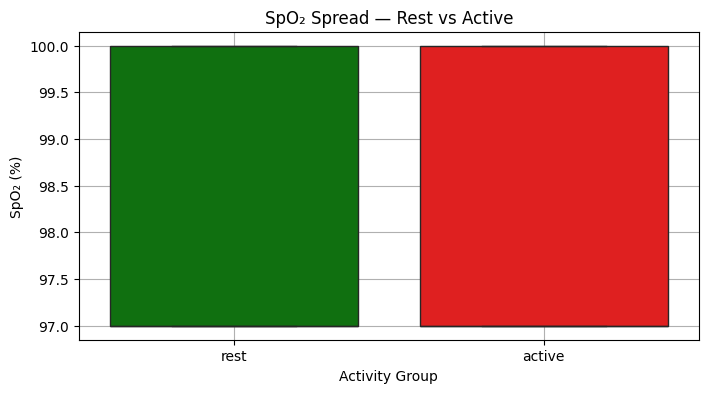

In [49]:
plt.figure(figsize=(8,4))
sns.boxplot(x="activity_group", y="spo2", data=df_clean, palette=["green", "red"])
plt.title("SpO₂ Spread — Rest vs Active")
plt.xlabel("Activity Group")
plt.ylabel("SpO₂ (%)")
plt.grid(True)
plt.show()
